<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_07_Seaborn%EC%8B%A4%EC%8A%B5_fmri%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.07. Seborn 실습 - fmri 데이터


---
* 날짜: 2022-04-19
* 이름: 박태현

## 학습내용

    - pairplot을 이용해 모든 변수의 분포 및 관계를 시각화 한다.
    - relplot을 이용해 두 변수의 관계를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')
```


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
fmri = sns.load_dataset('fmri')
fmri.head()
```

In [2]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


#### | 데이터 기본 탐색

In [8]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [9]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [10]:
fmri.subject.unique(), fmri.event.unique(), fmri.region.unique()

(array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
        's3', 's2', 's1', 's0'], dtype=object),
 array(['stim', 'cue'], dtype=object),
 array(['parietal', 'frontal'], dtype=object))

### (2) Pair plot

```
seaborn.pairplot(data, *, 
                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶
```

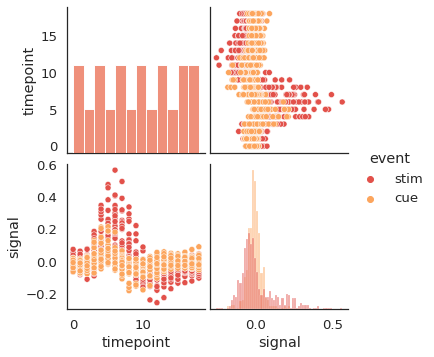

In [11]:
sns.pairplot(data = fmri, # 수치 자료형에 대해서만 상관플롯 빛 분포를 그려줌
             hue = 'event', # event에 따라 색깔 나누기
             diag_kind='hist', # 대각선의 분포플롯 종류 
             
             )

### (3) Relational plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.relplot(x=None, y=None, 
                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)
```

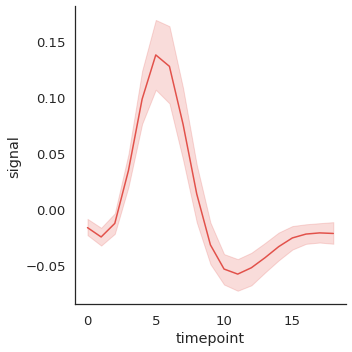

In [14]:
sns.relplot(data = fmri, x = 'timepoint', y = 'signal',
            kind = 'line', # 실선은 평균
            
            
            )

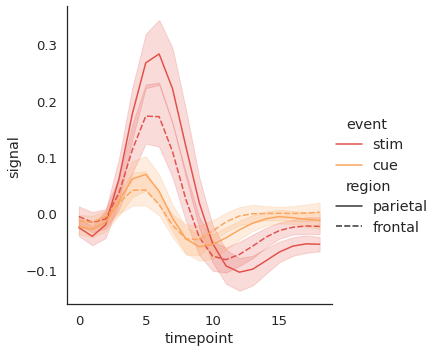

In [19]:
sns.relplot(data = fmri, x = 'timepoint', y = 'signal',
            kind = 'line', # 실선은 평균
            hue = 'event',
            # size = 'region' # 뇌 영역별로 선의 굵기 분류
            style = 'region'# 뇌 영역별로 선 스타일 분류
            #
            )

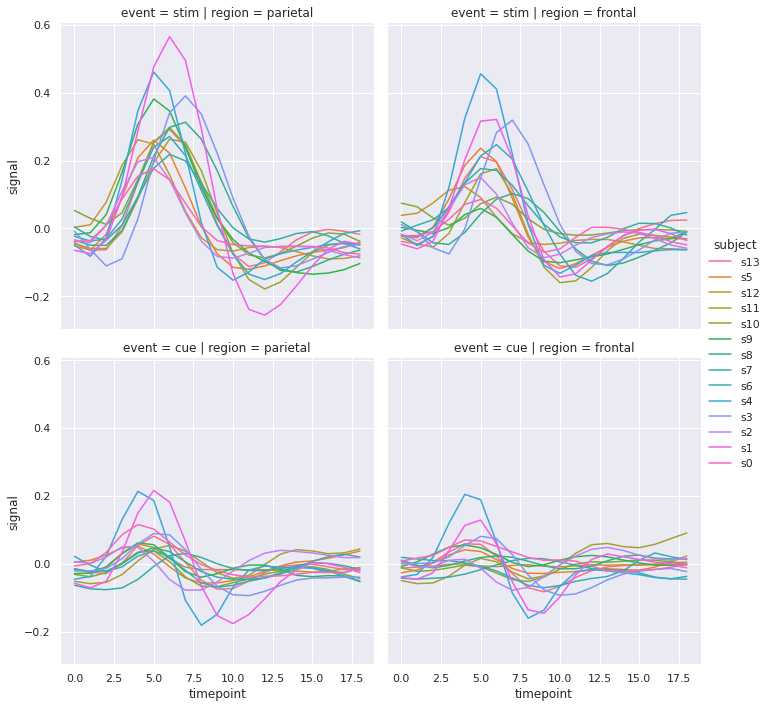

In [37]:
# 실험자 별로 그래프 그리기
sns.relplot(data = fmri, x = 'timepoint', y = 'signal',
            kind = 'line',
            hue = 'subject',
            col = 'region', # 영역별 로 플롯 따로 그리기 (새로운 열)
            row = 'event' # 이벤트별 플롯 따로 그리기 (새로운 행)
           )

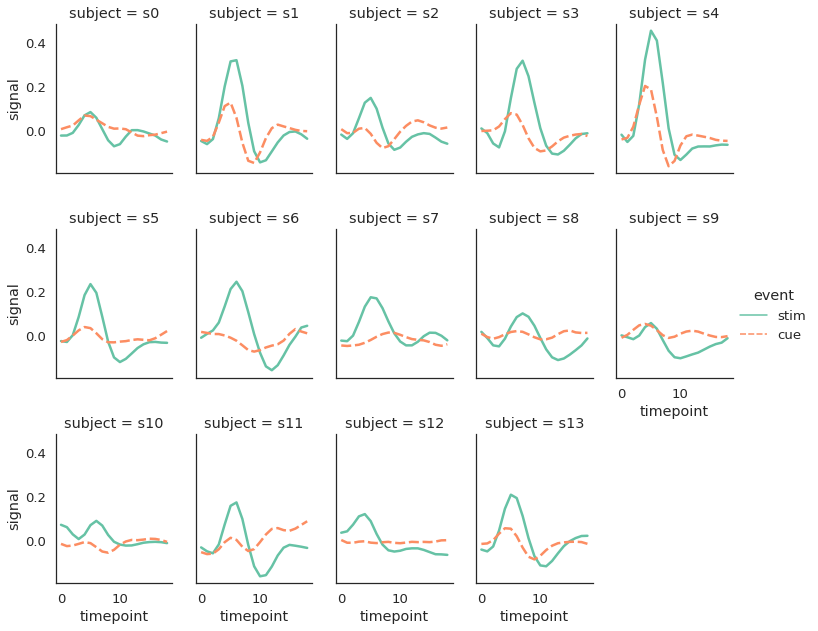

In [56]:
# 참가자별로 별도의 플롯을 그려보자
# stim : 자극이 있을 때 없을 때 비교
# region : 'frontal' < parietal 만 사용

# mask = fmri.region == 'paretal'
# fmri[mask]

# -> .query()로도 가능
# fmri.query("region == 'frontal'")



sns.relplot(data = fmri.query("region == 'frontal'"), x = 'timepoint', y = 'signal',
            kind = 'line',
            hue = 'event',
            col = 'subject',
            col_order = [f's{i}' for i in range(14)], # 열 순서 지정
            col_wrap = 5, # 열 개수 조정
            aspect = .7, # 그림 가로 사이즈 조정
            height = 3, # 그림 세로 사이즈
            linewidth = 2.5, # 선 굵기
            style = 'event', # 이벤트별 선 스타일 구분

           )


## **과제: flights**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-03.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("flights")
```

In [18]:
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


### (2) Pair plot

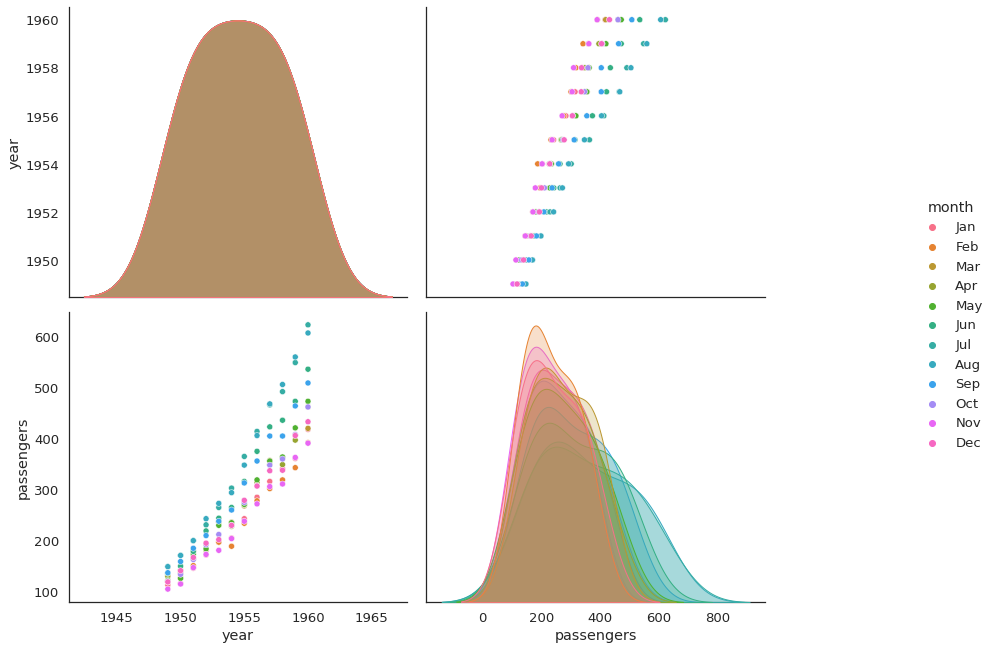

In [74]:
sns.pairplot(data = df, hue = 'month',)

plt.gcf().set_size_inches(16, 10)

### (3) Relational plot

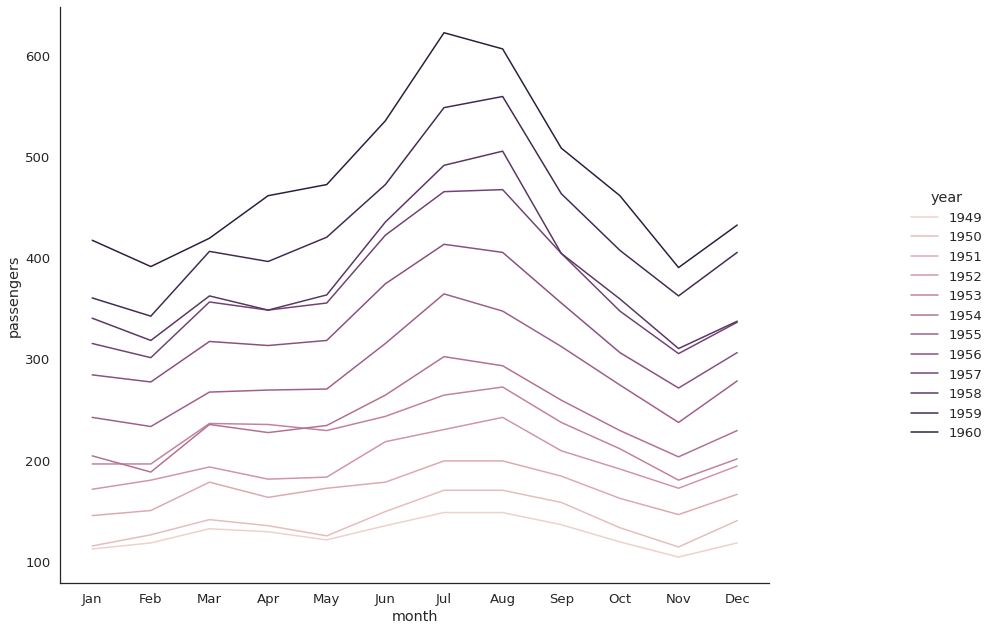

In [75]:
sns.relplot(data = df, x = 'month', y = 'passengers',
            kind = 'line',
            hue = 'year',
            legend = 'full'
            )

plt.gcf().set_size_inches(16, 10)


## **과제: [Response of neurons](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html)**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-02.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("dots")
```

In [57]:
df2 = sns.load_dataset("dots")
df2

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


#### | 데이터 기본 탐색


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB


In [77]:
df2.describe()

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


In [85]:
df2.align

<bound method DataFrame.align of     align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]>

### (2) Pair plot

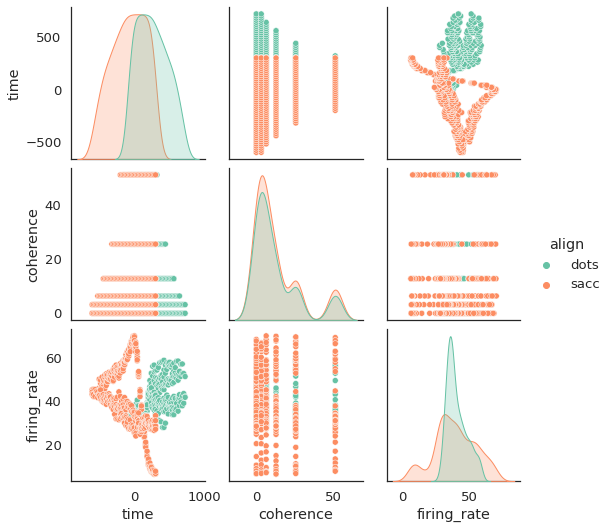

In [87]:
sns.pairplot(data = df2, hue = 'align')

### (3) Relational plot

In [96]:
mask = df2['align'] == 'dots'
df2[mask]

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


Text(0.5, 1.0, 'Align "dots" plot')

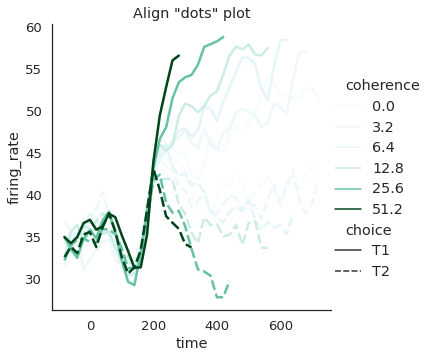

In [104]:
sns.relplot(data = df2[mask], x= 'time', y = 'firing_rate', 
            kind = 'line', hue = 'coherence', style = 'choice',
            linewidth = 2.5, palette = 'BuGn'
            )
plt.title('Align "dots" plot')